For the is assignment I will perform logistic regression where the outputs are multiclass using the red wine dataset. I will be predicting the column, quality, in this dataset. 

In [3]:
#these are the necessary libaries used to perform eda, preprocessing and logistic regression 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [6]:
#retrieve file path for red wine csv
wine = 'C:/Users/dgmur/OneDrive/Desktop/INFO 5505/winequality-red.csv'
#convert red wine csv into a dataframe
df = pd.read_csv(wine)
#display the first 5 rows of the red wine data frame
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

There are 12 columns, and 1599 observations. For the columns there are 11 continuous variables and one discrete variable. Lastly, there are no missing values. 

In [9]:
#display the datatypes of the dataframe
print("information:",'\n',df.info(),'\n')
#display the dimensions of the dataframe
print("shape of data:",'\n',df.shape,'\n')
#check for any missing values in the dataframe
print("missing values:"'\n',df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
information: 
 None 

shape of data: 
 (1599, 12) 

missing values:
 fixed acidity           0
volatile acidity        0
citri

I computed a histogram of all the columns in this dataset to check the distribution of each column. pH shows a normal distribution, and the rest of the columns showed some sign of skewedness. 

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

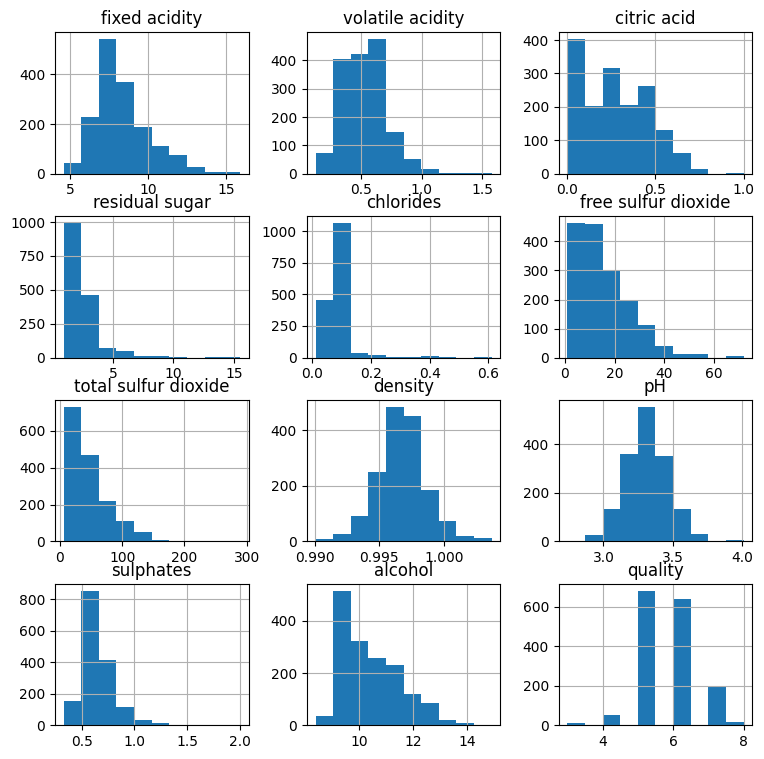

In [11]:
#display a histogram for of the red wine dataframe
df.hist(figsize=(9,9))

I used a correlation heatmap, so I can see what predictors show a relationship with quality. Alcohol, sulphates, citric acid, and volatile acidity had the highest correlation value in either the positive or negative direction. 

<Axes: >

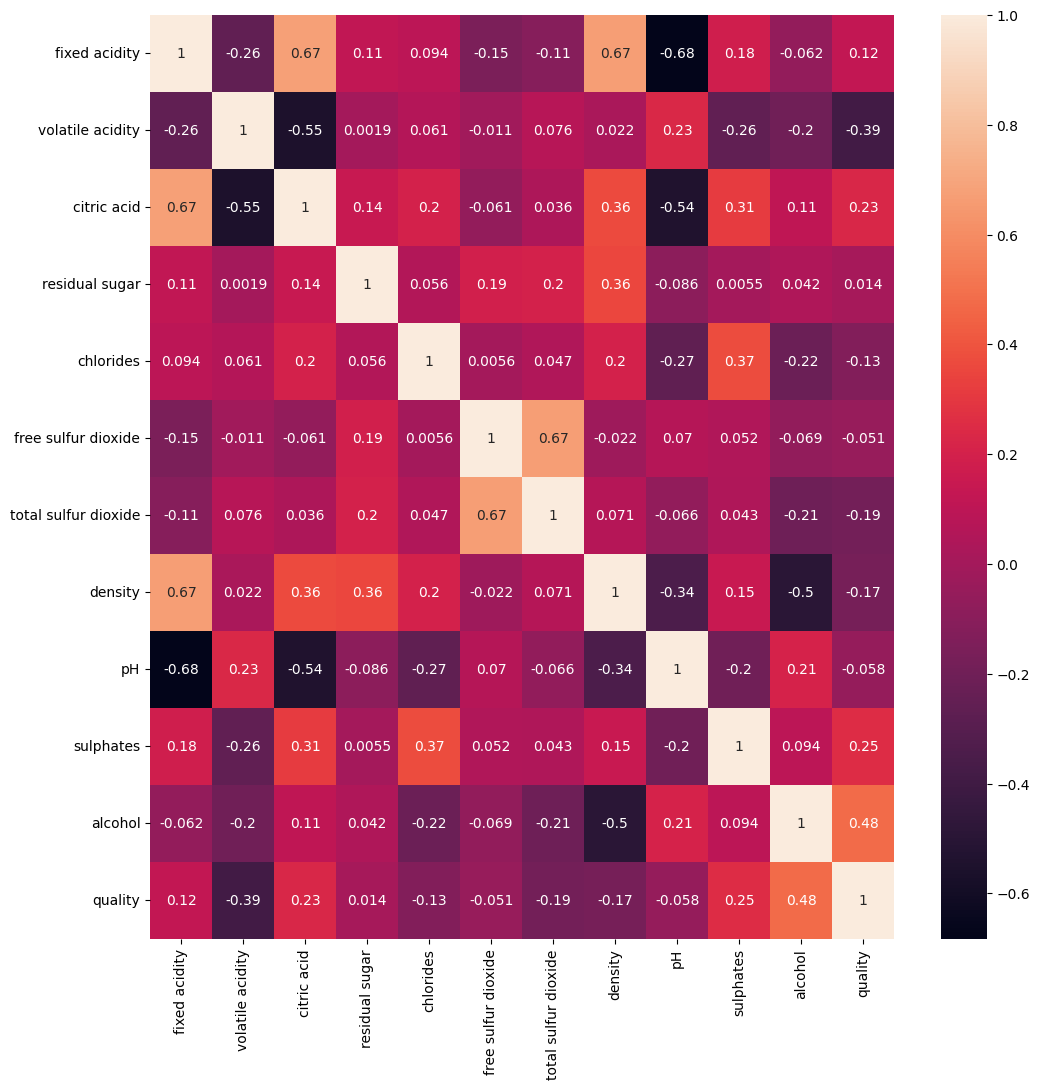

In [14]:
#compute the correlations for all of the columns 
df_corr = df.corr()
#display the correlations as a heatmap
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(df_corr, annot=True, ax=ax)

I decided to create two models to compare and contrast. One that consisted of all of the predictors (all the columns besides quality). Then the other model will consist of Alcohol, sulphates, citric acid, and volatile acidity as the predictors. 

Since the columns are in different units, I decided to standardize predictors for the models. 

In [18]:
# separate teh predictors and response variables of the dataset
x = df.iloc[:,0:11]

y = df['quality']

scale = StandardScaler()
#scale the predictor variables since they are in different units
x_scale = scale.fit_transform(x)

df.iloc[:,0:11] = pd.DataFrame(x_scale)
#check if the transformation ocurred 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5


I perform an 80/20 train-test split to assess how well the model generalizes for the first model which consists of all of the predictors. 

In [19]:
#assign the scaled predictors as X 
X = df.drop(['quality'], axis =1)
#assign quality as the Y
Y = df['quality']

In [20]:
#split the data into a train test split where the train consists of 80% of the data and
#the test consists of 20%
seed = 8 

x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=seed)

I used to a grid search to find the best value for C in the logistic regression model.

In [32]:
#call the logistic regression function from sckikit learn
logit = LogisticRegression(random_state=seed,max_iter=1000)
#establish the parameters for the grid search
param_grid = [{'C': [0.001, .01, 1,10,50,100,1000]}]
#use the grid search function using parameters established on logitisitc regression
grid_search = GridSearchCV(logit, param_grid=param_grid, cv=5, scoring = 'accuracy')




In [33]:
#fit the grid search with the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=8),
             param_grid=[{'C': [0.001, 0.01, 1, 10, 50, 100, 1000]}],
             scoring='accuracy')

In [60]:
#display the best the best estimator
print(grid_search.best_estimator_)
# display the best parameters 
print(grid_search.best_params_)
#display the best accuracy score
best = grid_search.best_score_
print("best accuracy:{:.2f}%".format(best*100))


LogisticRegression(C=1000, max_iter=1000, random_state=8)
{'C': 1000}
best accuracy:59.65%


The best C value in the LogisticRegression model was 1000, then I computed the score out of the grid search cross validation method.

In [59]:
#apply the new parameters to the logistics regression model
new_logit = LogisticRegression(C=1000, random_state=seed, max_iter=1000)
#fit the model with the training data
new_logit.fit(x_train, y_train)
#Compute the accuracy of the model using the testing
acc = new_logit.score(x_test, y_test)

print("accuracy: {:.2f}%".format(acc*100))

accuracy: 56.25%


Then, I created a new model that uses parameters suggested by the grid search. Then I assessed to performance by computing the accuracy using the testing model. The accuracy was slightly less. This means that the model is overfitting a bit. 

In [54]:
from sklearn.model_selection import KFold,cross_val_score
#compute k fold cross validation for accuracy
num_fold = 10 


k_fold = KFold(n_splits=num_fold, random_state=seed, shuffle= True)

scoring = 'accuracy'

results = cross_val_score(new_logit, X, Y, scoring=scoring)

#find the average of all of the cross validation scores
cross_val_results = (results.mean()*100)

print("cross val accuracy score: {:.2f}%".format(cross_val_results))


cross val accuracy score:57.79%


I performed k-fold cross validation, and computed the mean of the cross validation scores. The accuracy score was about 1% higher than the accuracy score that was computed using the testing data. It performed better than the testing data, however, since it is still it is less than the training accuracy, the model still overfitted. 

For the 2nd model, the predictors will be alcohol, sulphates, citric acid, and volatile acidity. A 80/20 train-test split was also used to assess how well the model generalizes for the first model which consists of all of the predictors

In [39]:
#predictors for the 2nd model
new_x = df[['alcohol', 'sulphates','citric acid', 'volatile acidity']]


In [41]:
#split the data into a train test split where the train consists of 80% of the data and
#the test consists of 20%, this is for the 2nd model
seed = 8 

x_train2,x_test2, y_train2, y_test2 = train_test_split(new_x,Y, test_size=0.2, random_state=seed)

I used to a grid search to find the best value for C in the 2nd logistic regression model. 

In [42]:
#call the logistic regression function from sckikit learn
logit = LogisticRegression(random_state=seed,max_iter=1000)
#establish the parameters for the grid search
param_grid = [{'C': [0.001, .01, 1,10,50,100,1000]}]
#use the grid search function using parameters established on logitisitc regression
grid_search2 = GridSearchCV(logit, param_grid=param_grid, cv=5, scoring = 'accuracy')


In [43]:
#fit the grid search with the training data
grid_search2.fit(x_train2,y_train2)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=8),
             param_grid=[{'C': [0.001, 0.01, 1, 10, 50, 100, 1000]}],
             scoring='accuracy')

In [61]:
#display the best the best estimator
print(grid_search2.best_estimator_)
#display the best accuracy score
best2 = grid_search2.best_score_

print("best accuracy:{:.2f}%".format(best2*100))

LogisticRegression(C=1, max_iter=1000, random_state=8)
best accuracy:57.94%


The best C value in the LogisticRegression model was 1, then I computed the score out of the grid search cross validation method.

In [45]:
#apply the new parameters to the 2nd logistic regression model
new_logit2 = LogisticRegression(C=1, random_state=seed, max_iter=1000)
#fit the model with the training data
new_logit2.fit(x_train2, y_train2)

LogisticRegression(C=1, max_iter=1000, random_state=8)

In [58]:
acc2 = new_logit2.score(x_test2, y_test2)
#Compute the accuracy of the 2nd model using the testing 
print("accuracy: {:.2f}%".format(acc2*100))

accuracy: 56.25%


Then, I created a new model that uses parameters suggested by the grid search. Then I assessed to performance by computing the accuracy using the testing model. The accuracy was slightly less as well. This model also shows signs of overfitting. 

In [56]:
from sklearn.model_selection import KFold,cross_val_score
#compute k fold cross validation for accuracy of the 2nd model 
num_fold = 10 


k_fold = KFold(n_splits=num_fold, random_state=seed, shuffle= True)

scoring = 'accuracy'

results2 = cross_val_score(new_logit2, new_x, Y, scoring=scoring)

#find the average of all of the cross validation scores
cross_val_results2 = (results2.mean()*100)

print("cross val accuracy score: {:.2f}%".format(cross_val_results2))


cross val accuracy score: 57.54%


I performed k-fold cross validation, and computed the mean of the cross validation scores. The accuracy score was about 1% higher than the accuracy score that was computed using the testing data for the 2nd model. However, there is a tiny bit of overfitting because the accuracy for cross validation was slightly less than the training accuracy

In conclusion, the best model was the 2nd model. This was because the perecentage difference between the training accuracy score and the cross validation score was smaller for the 2nd model than the first. This indicates that the 2nd model generalized better with unseen data in comparison to the first model. 